# Credit Card Fraud (Thinkful Assignment 3.6.1)
### Problem Statement
Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

### Outline
1. [Data Exploration](#data)
2. [Feature Engineering](#feature)
3. [Model Building](#model)
4. [Evaluation](#evaluation)

In [1]:
# tools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
from sklearn import metrics
import random
# models
from sklearn.naive_bayes import BernoulliNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
from sklearn import ensemble # RandomForestClassifier(), GradientBoostingClassifier()
from sklearn import linear_model # LogisticRegression(penalty = 'l1') OLS, RidgeClassifier(), LogisticRegression(penalty = 'l2') Lasso Classifier
from sklearn import svm # SVC()
from sklearn.model_selection import cross_val_score

In [2]:
'''
#### Naive Bayes
bnb = BernoulliNB()
cross_val_score(bnb, X, Y, cv=10)

#### KNN Classifier
neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(neighbors, X, Y, cv=10)

#### RandomForestClassifier 
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
cross_val_score(rfc, X, Y, cv=10)

#### Logistic Regression
vanilla_model = linear_model.LogisticRegression(penalty = 'l2', C=1e9)
cross_val_score(vanilla_model, X.apply(stats.zscore, axis = 1), y, cv = 5)

#### Ridge Classifier
ridge_model = linear_model.RidgeClassifier(alpha = 1e-4)
cross_val_score(ridge_model, X, y, cv = 5)

#### Lasso Classifier
lasso_model = linear_model.LogisticRegression(penalty = 'l1')
cross_val_score(lasso_model, X, y, cv = 5)

#### SVClassifier
svc_model = svm.SVC(C = 100, kernel = 'rbf')
cross_val_score(svc_model, X, y, cv = 5)

#### Gradient Boost Classifier
params = {'n_estimators': 500,
          'max_depth': 2,
          'subsample': 0.5,
          'learning_rate': 0.001,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
cross_val_score(clf, X, y, cv = 5)
''';

<a id = 'data'></a>
# 1. Data Exploration

In [3]:
# load data
data_path = '../../datasets/credit_card_fraud/credit_card_fraud.csv'
df = pd.read_csv(data_path)
print ("Shape of Data: {}".format(df.shape))
df_norm = (df - df.mean()) / (df.max() - df.min())
# input/outcome variables
X = df_norm[list(set(list(df_norm.columns)) - set(['Class']))]
Y = df['Class']

Shape of Data: (284807, 31)


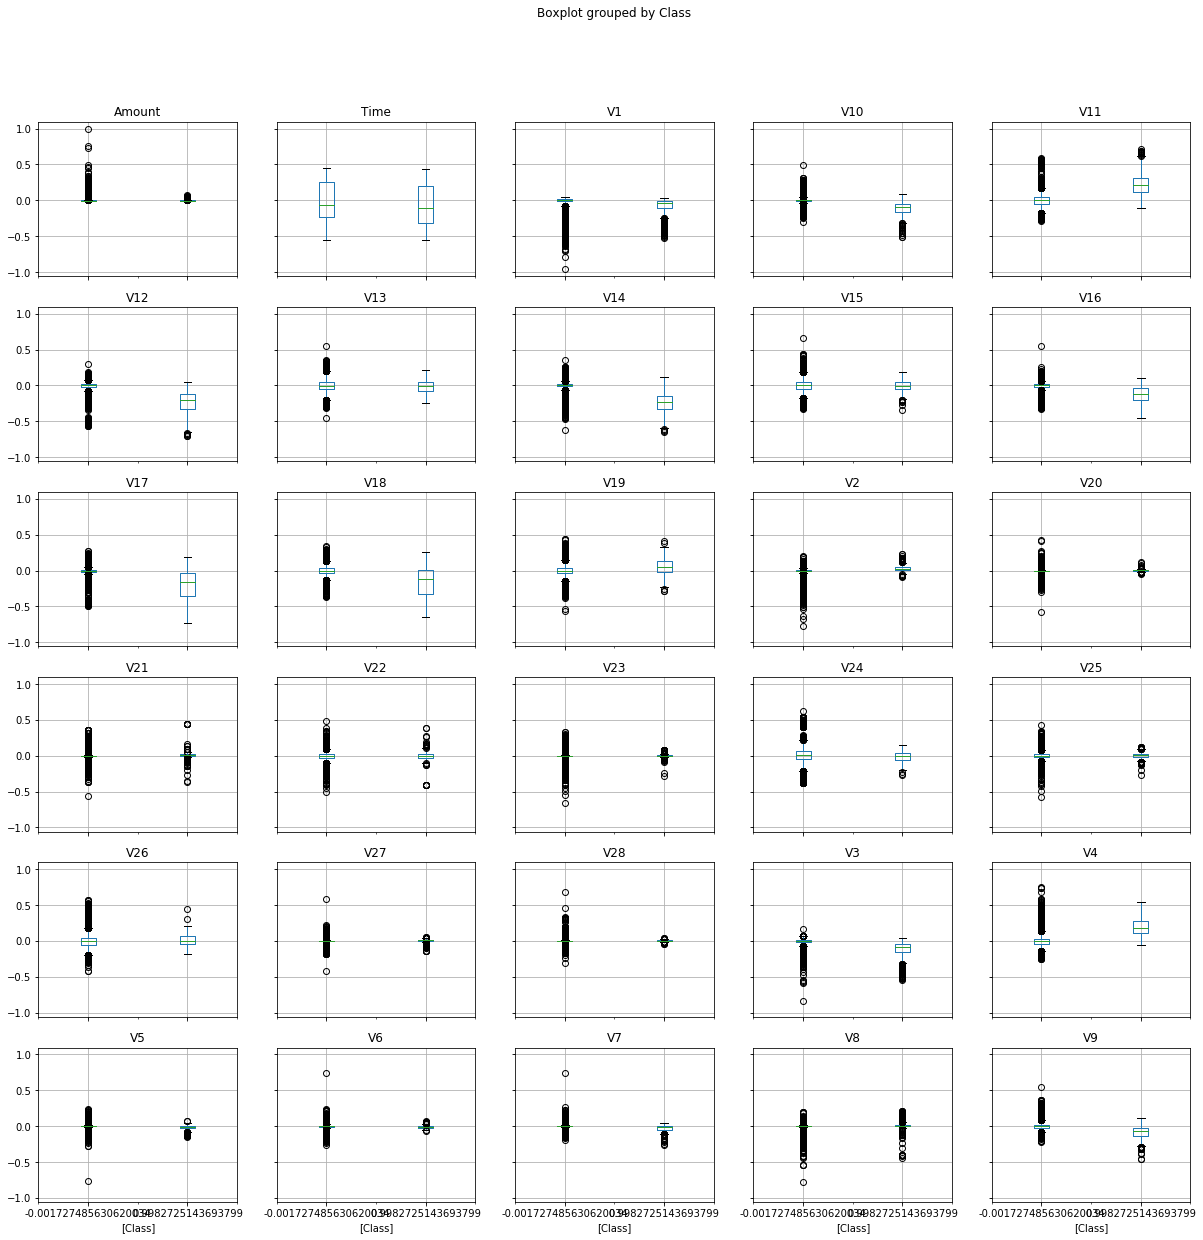

In [4]:
# distributions by Class
df_norm.boxplot(by = 'Class', figsize=(20,20));

<a id = 'feature'></a>
# 2. Feature Engineering

In [5]:
# ??? ideas ???

<a id = 'model'></a>
# 3. Model Building

In [6]:
df_acc = pd.DataFrame()
df_auc = pd.DataFrame()
# holdout 30%: maintain unbalanced classes
fraud_idx = list(Y[Y == 1].index)
random.shuffle(fraud_idx)
non_fraud_idx = list(set(Y.index) - set(fraud_idx))
random.shuffle(non_fraud_idx)
fraud_train_idx = fraud_idx[:int(0.7 * len(fraud_idx))]
fraud_test_idx = fraud_idx[int(0.7 * len(fraud_idx)):]
non_fraud_train_idx = non_fraud_idx[:int(0.7 * len(non_fraud_idx))]
non_fraud_test_idx = non_fraud_idx[int(0.7 * len(non_fraud_idx)):]
train_idx = fraud_train_idx + non_fraud_train_idx
test_idx = fraud_test_idx + non_fraud_test_idx
# make holdout groups
X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
Y_train = Y.iloc[train_idx]
Y_test = Y.iloc[test_idx]

In [31]:
# runtime ~ 0.24 seconds
#### Naive Bayes
start = time.time()
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
bnb_pred = bnb.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
def evaluate(model_name, Y_pred):
    acc = []
    cross_tab = pd.crosstab(Y_test, Y_pred)
    acc.append((cross_tab.iloc[0,0] + cross_tab.iloc[1,1]) / (cross_tab.sum().sum()))
    df_acc[model_name] = acc
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    df_auc[model_name] = [auc]
evaluate('Naive Bayes', bnb_pred)

Runtime 0.24


In [37]:
# runtime ~ 447.93 seconds
#### KNN Classifier
start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree', n_jobs = 3)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('KNN',knn_pred)

Runtime 447.93


In [42]:
# runtime ~ 7.58 seconds
#### RandomForestClassifier 
start = time.time()
rfc = ensemble.RandomForestClassifier(n_jobs = 3)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Random Forest', rfc_pred)

Runtime 7.58


In [43]:
# runtime ~ 4.91 seconds
#### Logistic Regression
start = time.time()
log_reg_model = linear_model.LogisticRegression(penalty = 'l2', C=1e9, n_jobs = 3)
log_reg_model.fit(X_train, Y_train)
log_reg_pred = log_reg_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Logistic Regression', log_reg_pred)

Runtime 4.91


In [44]:
# runtime ~ 0.21 seconds
#### Ridge Classifier
start = time.time()
ridge_model = linear_model.RidgeClassifier(alpha = 1e-4)
ridge_model.fit(X_train, Y_train)
ridge_pred = ridge_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Ridge Regression', ridge_pred)

Runtime 0.21


In [45]:
# runtime ~ 1.21 seconds
#### Lasso Classifier
start = time.time()
lasso_model = linear_model.LogisticRegression(penalty = 'l1', n_jobs = 3)
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Lasso Regression', lasso_pred)

Runtime 1.21


In [46]:
# runtime ~ 13.47 seconds
#### SVClassifier
start = time.time()
svc_model = svm.SVC(C = 100, kernel = 'rbf')
svc_model.fit(X_train, Y_train)
svc_pred = svc_model.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('SVM', svc_pred)

Runtime 13.47


In [47]:
# runtime ~ 183.14 seconds
#### Gradient Boost Classifier
start = time.time()
params = {'n_estimators': 500,
          'max_depth': 2,
          'subsample': 0.5,
          'learning_rate': 0.001,
          'loss': 'deviance'}
gbc = ensemble.GradientBoostingClassifier(**params)
gbc.fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))
evaluate('Gradient Boost', gbc_pred)

Runtime 183.14


<a id = 'evaluation'></a>
# 4. Evaluation

In [48]:
# Baseline Accuracy: guess 0
print ("Baseline Accuracy: %0.4f" % ((Y == 0).sum() / len(Y)))

Baseline Accuracy: 0.9983


In [49]:
# Accuracy scores
display(df_acc)

,Naive Bayes,KNN,Random Forest,Logistic Regression,Ridge Regression,Lasso Regression,SVM,Gradient Boost
0,0.999204,0.99938,0.999473,0.999228,0.998958,0.999146,0.99938,0.998326


In [50]:
# AUC, because very imbalanced outcomes
display(df_auc)

,Naive Bayes,KNN,Random Forest,Logistic Regression,Ridge Regression,Lasso Regression,SVM,Gradient Boost
0,0.830976,0.847926,0.864836,0.810752,0.729677,0.783731,0.898514,0.516892
